In [0]:
#Setup without google drive access
data_folder = 'data'
!git clone https://github.com/mogwai/fastai_audio.git
%cd fastai_audio
!git pull
!bash install.sh

Cloning into 'fastai_audio'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 1500 (delta 33), reused 136 (delta 23), pack-reused 1342
Receiving objects: 100% (1500/1500), 177.10 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (853/853), done.
/content/fastai_audio
Already up to date.
     |████████████████████████████████| 81kB 4.4MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103527 sha256=3455feb33a6a28cb0c04fa76db3a23c4c9c7c4df5a962229bb19ec9a94ec5581
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libmagic-mgc libm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os , shutil
os.listdir('/content/drive/My Drive/dataset')

['train (1).zip', 'test.zip']

In [0]:
!unzip '/content/drive/My Drive/dataset/train (1).zip'
!unzip '/content/drive/My Drive/dataset/test.zip' 

Archive:  /content/drive/My Drive/dataset/train (1).zip
   creating: Train/
  inflating: train.csv               
  inflating: Train/0.wav             
  inflating: Train/1.wav             
  inflating: Train/10.wav            
  inflating: Train/100.wav           
  inflating: Train/1000.wav          
  inflating: Train/1001.wav          
  inflating: Train/1003.wav          
  inflating: Train/1004.wav          
  inflating: Train/1006.wav          
  inflating: Train/1007.wav          
  inflating: Train/1008.wav          
  inflating: Train/101.wav           
  inflating: Train/1014.wav          
  inflating: Train/1015.wav          
  inflating: Train/1017.wav          
  inflating: Train/1018.wav          
  inflating: Train/1021.wav          
  inflating: Train/1022.wav          
  inflating: Train/1024.wav          
  inflating: Train/1025.wav          
  inflating: Train/1026.wav          
  inflating: Train/1027.wav          
  inflating: Train/1028.wav          
  inflating:

In [0]:
!pip install pyforest
from pyforest import *

  Created wheel for pyforest: filename=pyforest-0.1.4-py2.py3-none-any.whl size=9606 sha256=70157d40325c495faec9e284b041bcb68ec23ab1bfe13b6b386de84e030298b6
  Stored in directory: /root/.cache/pip/wheels/b5/6f/28/9dd3fc38ca88e9c30712fc6c61aa83dca4dc496c82136c38f2
Successfully built pyforest


In [0]:
df=pd.read_csv('train.csv')
df_t=pd.read_csv('test.csv')

In [0]:
from  audio import *
sg_cfg= SpectrogramConfig(hop=128, n_mels=128, n_fft=1024, top_db=80, f_min=20, f_max=22050)
config_segment = AudioConfig(cache=True,remove_silence = "trim", sg_cfg=sg_cfg , delta=True,mfcc=True,resample_to=44100,downmix=True)
tfms = get_spectro_transforms(size=(128,128),mask_time=True, mask_frequency=True,roll=True,num_rows=40, num_cols=28)#using 224 for resnet50 use 256 for resnet34

In [0]:
def label_pattern(path):
  d=str(path).split('.')[0][len('Train/'):]
  d=list(df[df['ID']==int(d)].Class)
  if len(d)==0:
    print('no')
    return
  else:
    return d[0]

In [0]:
from sklearn.model_selection import StratifiedKFold
SEED=42
def get_data(fold,tfms,config_segment):
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
  valid_idx = list(kf.split(df.ID.values,df.Class.values))[fold][1]
  db_sg = (AudioList.from_folder('Train', config=config_segment).
         split_by_idx(valid_idx).
         label_from_func(label_pattern).
         transform(tfms=tfms).
         databunch(bs=256))
  return db_sg

fold:  0
Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
1e-2
0.01


epoch,train_loss,valid_loss,accuracy,time
0,2.590384,3.540405,0.214876,01:10
1,2.244794,2.405824,0.289256,00:54
2,1.983871,2.187893,0.456382,00:54
3,1.738599,1.212590,0.632691,00:54
4,1.550743,1.665213,0.533517,00:54
5,1.372561,1.462005,0.626263,00:54
6,1.267821,2.323480,0.543618,00:54
7,1.151354,1.528818,0.680441,00:54
8,1.058349,0.760459,0.756657,00:54
9,0.955087,2.714875,0.525253,00:54


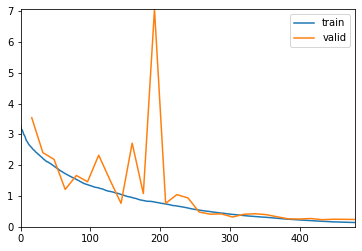

fold:  1
Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
3e-2
0.03


epoch,train_loss,valid_loss,accuracy,time
0,2.541708,17.898640,0.063419,00:56
1,2.152594,2.963672,0.294118,00:55
2,1.852137,2.254090,0.503676,00:54
3,1.611005,2.927423,0.402574,00:55
4,1.472792,3.091260,0.575368,00:55
5,1.405336,13.323709,0.213235,00:55
6,1.375858,65.311150,0.197610,00:55
7,1.465825,13052.892578,0.043199,00:55
8,1.511102,3.164379,0.540441,00:55
9,1.440039,1.404953,0.739890,00:54


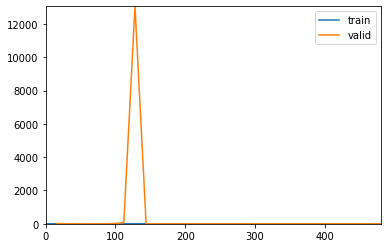

fold:  2
Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
3e-3
0.003


epoch,train_loss,valid_loss,accuracy,time
0,2.812397,2.658383,0.218951,00:56
1,2.547488,1.764541,0.418583,00:54
2,2.284398,1.736738,0.484821,00:54
3,2.045140,2.134228,0.445262,00:54
4,1.823400,1.299653,0.615455,00:54
5,1.617485,1.178474,0.663293,00:54
6,1.444244,1.005359,0.728611,00:54
7,1.305218,0.749637,0.774609,00:54
8,1.174631,0.649627,0.826127,00:54
9,1.071545,0.876880,0.767249,00:54


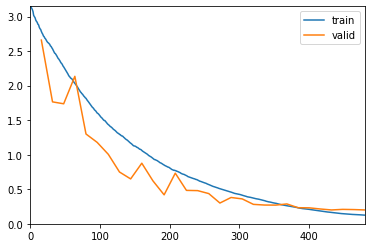

fold:  3
Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
5e-3
0.005


epoch,train_loss,valid_loss,accuracy,time
0,2.749635,2.952524,0.209945,00:56
1,2.424731,1.980346,0.344383,00:55
2,2.151214,1.713658,0.490792,00:54
3,1.922797,2.449704,0.425414,00:54
4,1.720568,1.601045,0.567219,00:54
5,1.548020,0.999972,0.719153,00:54
6,1.391839,1.601314,0.624309,00:54
7,1.244001,0.865004,0.735727,00:54
8,1.133641,1.272580,0.671271,00:54
9,1.026340,0.851992,0.779006,00:54


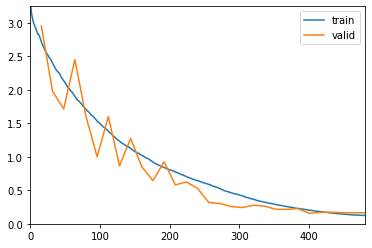

fold:  4
Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Downmixing to Mono


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
7e-3
0.007


epoch,train_loss,valid_loss,accuracy,time
0,2.707004,3.315179,0.145622,00:56
1,2.356834,2.516697,0.298618,00:55
2,2.099039,3.365964,0.304147,00:55
3,1.848233,4.235176,0.288479,00:55
4,1.665622,2.771512,0.453456,00:55
5,1.471207,2.399851,0.475576,00:55
6,1.306008,1.778254,0.597235,00:55
7,1.186314,1.221966,0.691244,00:56
8,1.078618,1.112297,0.720737,00:55
9,0.997752,1.011621,0.744700,00:55


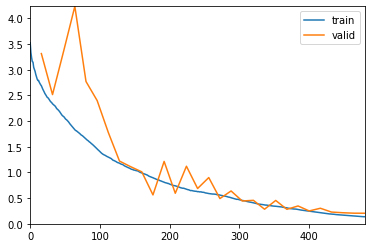

In [0]:
from fastai.callbacks import *
for fold in range(5):
    print('fold: ', fold)
    data = get_data(fold,tfms,config_segment)
    learn = audio_learner(data, models.resnet34,callback_fns=[ShowGraph], metrics=[accuracy])
    learn.lr_find()
    learn.callbacks +=[SaveModelCallback(learn, every='epoch', monitor='accuracy')]
    lr = float(input())
    print(lr)
    learn.fit_one_cycle(30, slice(lr/10,lr),wd=1e-3)
    learn.save('fold'+str(fold))

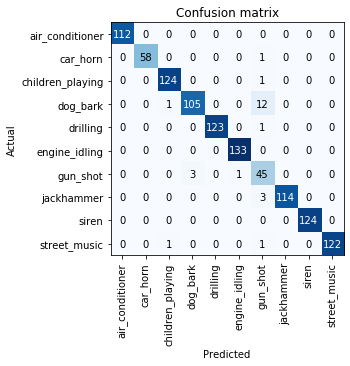

In [0]:
%matplotlib inline
learn.load('fold0')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

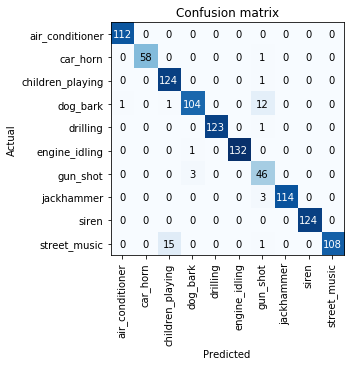

In [0]:
learn.load('fold1')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

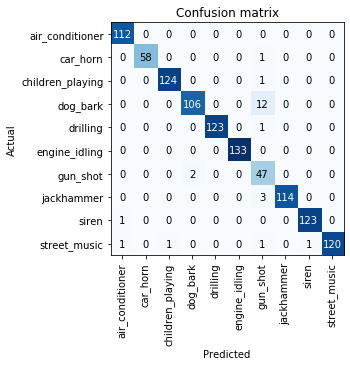

In [0]:
learn.load('fold2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

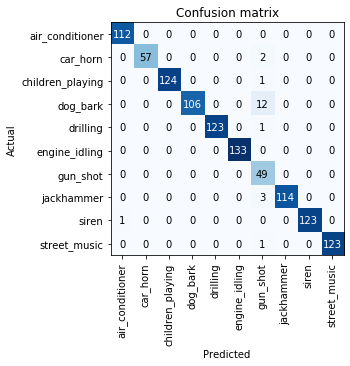

In [0]:
learn.load('fold3')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

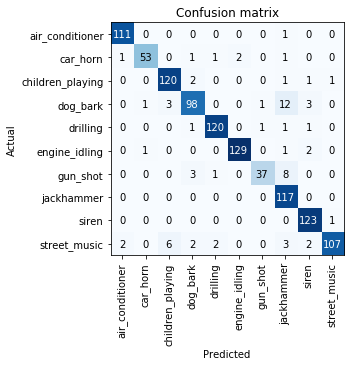

In [0]:
learn.load('fold4')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))